In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

FAKE NEWS SAMPLE:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

TRUE NEWS SAMPLE:
                                               title  \
0  As U.S. budget fight looms, Republicans flip

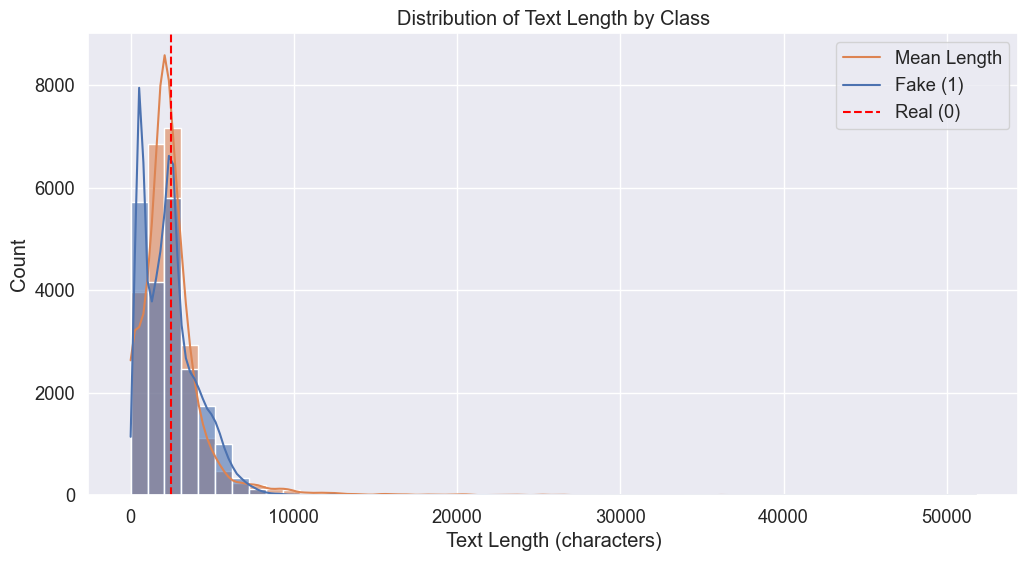

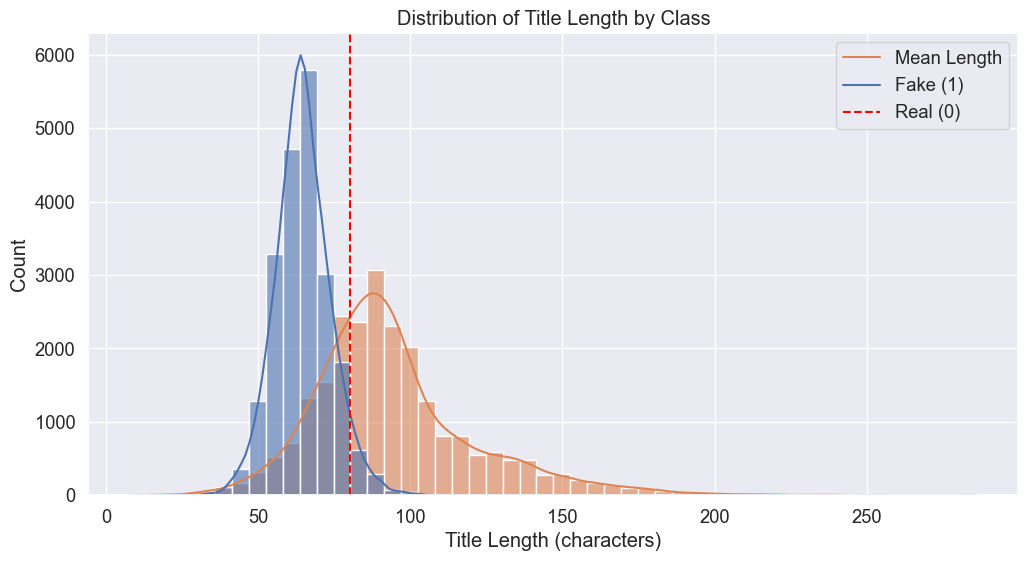

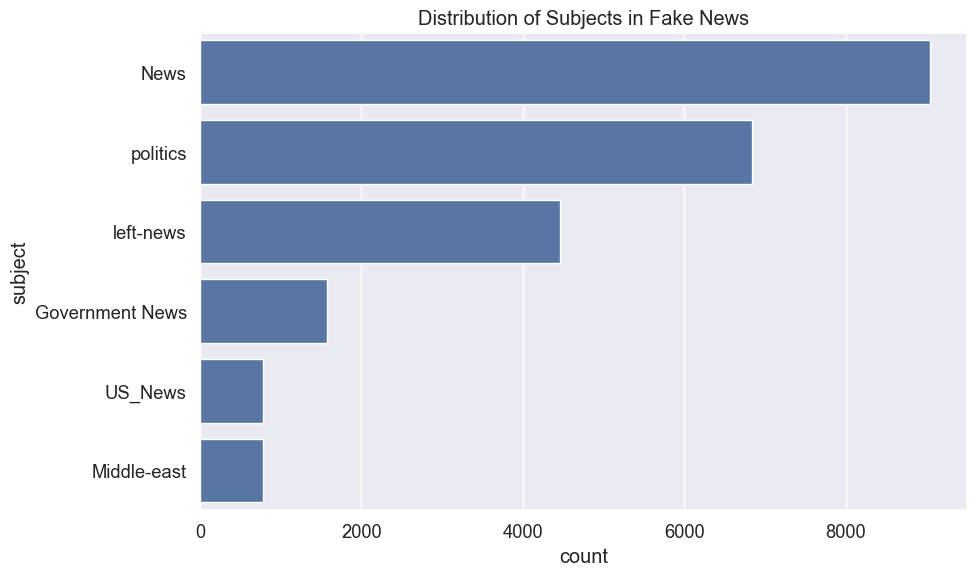

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the datasets
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

# Display the first few rows of each dataset
print("FAKE NEWS SAMPLE:")
print(fake_df.head())
print("\nTRUE NEWS SAMPLE:")
print(true_df.head())

# Add a target label column (1 for fake, 0 for true)
fake_df['label'] = 1
true_df['label'] = 0

# Check dataset sizes
print(f"\nFake news dataset shape: {fake_df.shape}")
print(f"True news dataset shape: {true_df.shape}")

# Column information
print("\nFake news columns:")
print(fake_df.columns)
print("\nTrue news columns:")
print(true_df.columns)

# Check for missing values
print("\nMissing values in fake news dataset:")
print(fake_df.isnull().sum())
print("\nMissing values in true news dataset:")
print(true_df.isnull().sum())

# Combine datasets
df = pd.concat([fake_df, true_df], axis=0)
df = df.reset_index(drop=True)

# Basic statistics
print("\nCombined dataset shape:", df.shape)
print("\nClass distribution:")
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True).map(lambda x: f"{x:.1%}"))

# Analyze text length
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

# Visualize text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, alpha=0.6, kde=True)
plt.title('Distribution of Text Length by Class')
plt.xlabel('Text Length (characters)')
plt.axvline(x=df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.0f}')
plt.legend(['Mean Length', 'Fake (1)', 'Real (0)'])
plt.savefig('text_length_distribution.png')
plt.show()

# Visualize title length
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='title_length', hue='label', bins=50, alpha=0.6, kde=True)
plt.title('Distribution of Title Length by Class')
plt.xlabel('Title Length (characters)')
plt.axvline(x=df['title_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["title_length"].mean():.0f}')
plt.legend(['Mean Length', 'Fake (1)', 'Real (0)'])
plt.savefig('title_length_distribution.png')
plt.show()

# Subject distribution in fake news
plt.figure(figsize=(10, 6))
sns.countplot(y='subject', data=fake_df, order=fake_df['subject'].value_counts().index)
plt.title('Distribution of Subjects in Fake News')
plt.tight_layout()
plt.savefig('fake_subjects.png')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Msi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


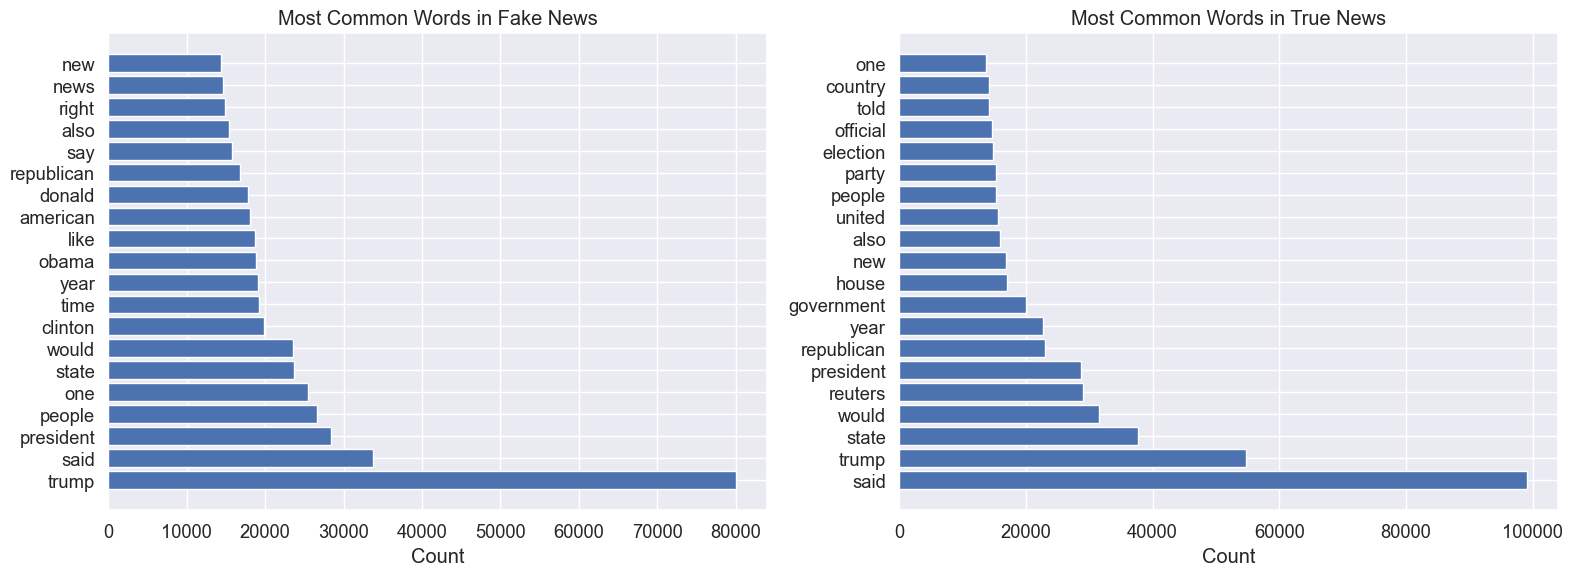

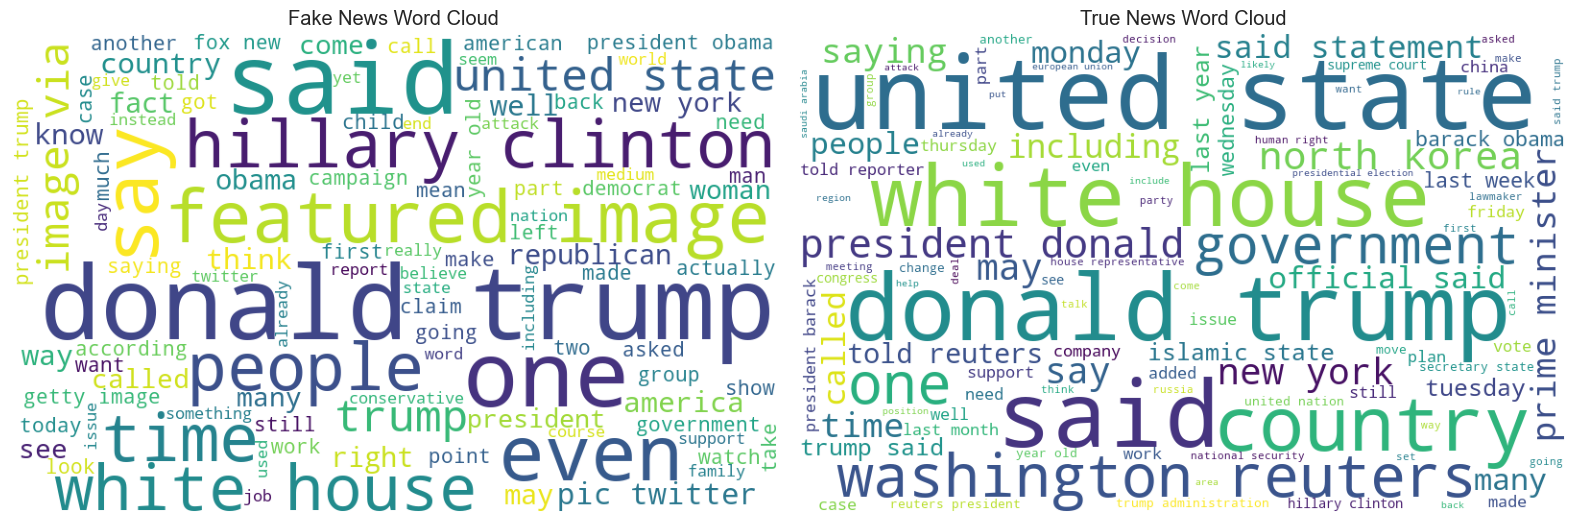

In [4]:
# Import NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return clean_tokens

# Get most common words in fake news
fake_news_text = ' '.join(fake_df['text'].tolist())
fake_tokens = clean_text(fake_news_text)
fake_word_freq = Counter(fake_tokens).most_common(20)

# Get most common words in true news
true_news_text = ' '.join(true_df['text'].tolist())
true_tokens = clean_text(true_news_text)
true_word_freq = Counter(true_tokens).most_common(20)

# Visualize most common words
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
words, counts = zip(*fake_word_freq)
plt.barh(words, counts)
plt.title('Most Common Words in Fake News')
plt.xlabel('Count')

plt.subplot(1, 2, 2)
words, counts = zip(*true_word_freq)
plt.barh(words, counts)
plt.title('Most Common Words in True News')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig('common_words.png')
plt.show()

# Create word clouds
from wordcloud import WordCloud

plt.figure(figsize=(16, 8))

# Fake news word cloud
plt.subplot(1, 2, 1)
fake_wordcloud = WordCloud(width=800, height=500, 
                           background_color='white', 
                           max_words=100, 
                           contour_width=3).generate(' '.join(fake_tokens))
plt.imshow(fake_wordcloud)
plt.title('Fake News Word Cloud')
plt.axis('off')

# True news word cloud
plt.subplot(1, 2, 2)
true_wordcloud = WordCloud(width=800, height=500, 
                           background_color='white', 
                           max_words=100, 
                           contour_width=3).generate(' '.join(true_tokens))
plt.imshow(true_wordcloud)
plt.title('True News Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.savefig('wordclouds.png')
plt.show()

In [5]:
# Text preprocessing and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for full text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to text columns
df['clean_text'] = df['text'].apply(preprocess_text)
df['clean_title'] = df['title'].apply(preprocess_text)

# Combine title and text (with title weighted more heavily)
df['content'] = df['clean_title'] + " " + df['clean_text']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], 
    df['label'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['label']
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# TF-IDF Feature Extraction
# n-grams range (1,2) captures single words and phrases of two words
tfidf_vectorizer = TfidfVectorizer(max_features=10000, 
                                  stop_words='english', 
                                  ngram_range=(1, 2),
                                  min_df=5)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF features shape: {X_train_tfidf.shape}")

# Get feature names for later analysis
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Sample features: {feature_names[:10]}")

Training set size: 35918
Testing set size: 8980
TF-IDF features shape: (35918, 10000)
Sample features: ['00' '00 pm' '000' '000 people' '000 refugees' '000 rohingya' '000 year'
 '10' '10 000' '10 billion']


In [6]:
# Import model libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Track model performance metrics
results = {}

# Multinomial Naive Bayes
print("Training Multinomial Naive Bayes...")
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
end_time = time.time()

# Predictions
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Store results
results['Naive Bayes'] = {
    'model': nb_model,
    'accuracy': nb_accuracy,
    'predictions': nb_pred,
    'training_time': end_time - start_time
}

# Logistic Regression
print("\nTraining Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
end_time = time.time()

# Predictions
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Store results
results['Logistic Regression'] = {
    'model': lr_model,
    'accuracy': lr_accuracy,
    'predictions': lr_pred,
    'training_time': end_time - start_time
}

# Random Forest
print("\nTraining Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
end_time = time.time()

# Predictions
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Store results
results['Random Forest'] = {
    'model': rf_model,
    'accuracy': rf_accuracy,
    'predictions': rf_pred,
    'training_time': end_time - start_time
}

# Support Vector Machine
print("\nTraining Linear SVM...")
start_time = time.time()
svm_model = LinearSVC(C=1.0, random_state=42, max_iter=10000)
svm_model.fit(X_train_tfidf, y_train)
end_time = time.time()

# Predictions
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Linear SVM Accuracy: {svm_accuracy:.4f}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Store results
results['Linear SVM'] = {
    'model': svm_model,
    'accuracy': svm_accuracy,
    'predictions': svm_pred,
    'training_time': end_time - start_time
}

Training Multinomial Naive Bayes...
Naive Bayes Accuracy: 0.9507
Training time: 0.04 seconds

Training Logistic Regression...
Logistic Regression Accuracy: 0.9890
Training time: 1.40 seconds

Training Random Forest...
Random Forest Accuracy: 0.9974
Training time: 51.14 seconds

Training Linear SVM...
Linear SVM Accuracy: 0.9958
Training time: 0.81 seconds



--- Naive Bayes Evaluation ---
Accuracy: 0.9507
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4284
           1       0.95      0.95      0.95      4696

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



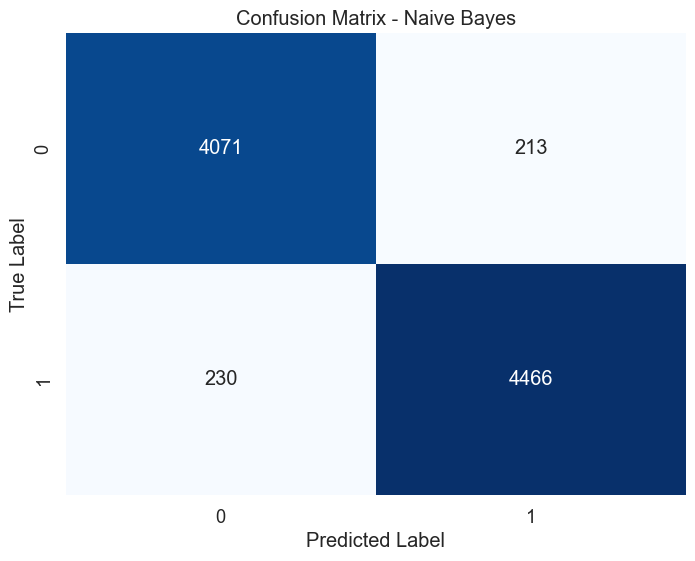


--- Logistic Regression Evaluation ---
Accuracy: 0.9890
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



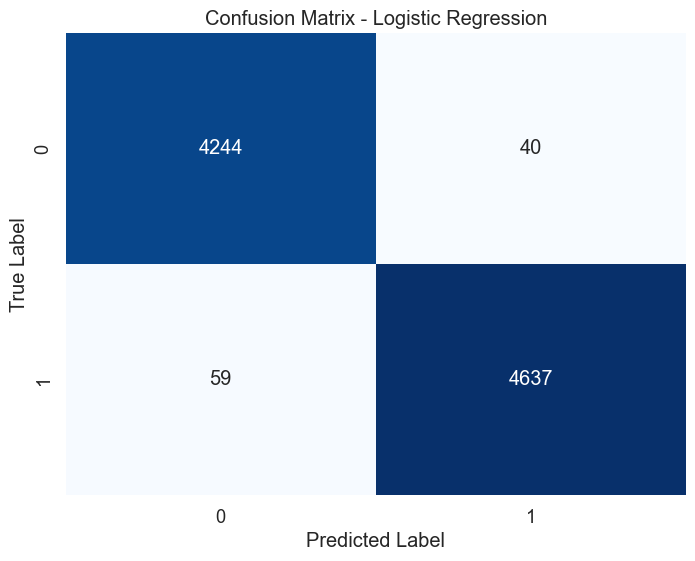


--- Random Forest Evaluation ---
Accuracy: 0.9974
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



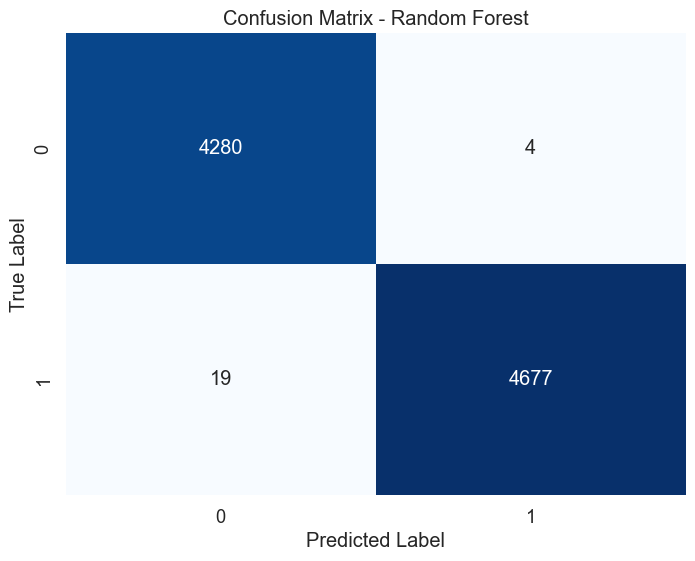


--- Linear SVM Evaluation ---
Accuracy: 0.9958
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



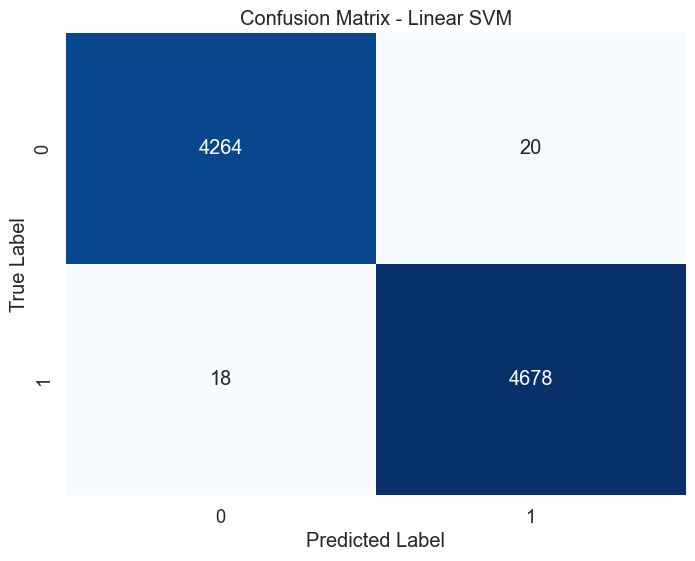

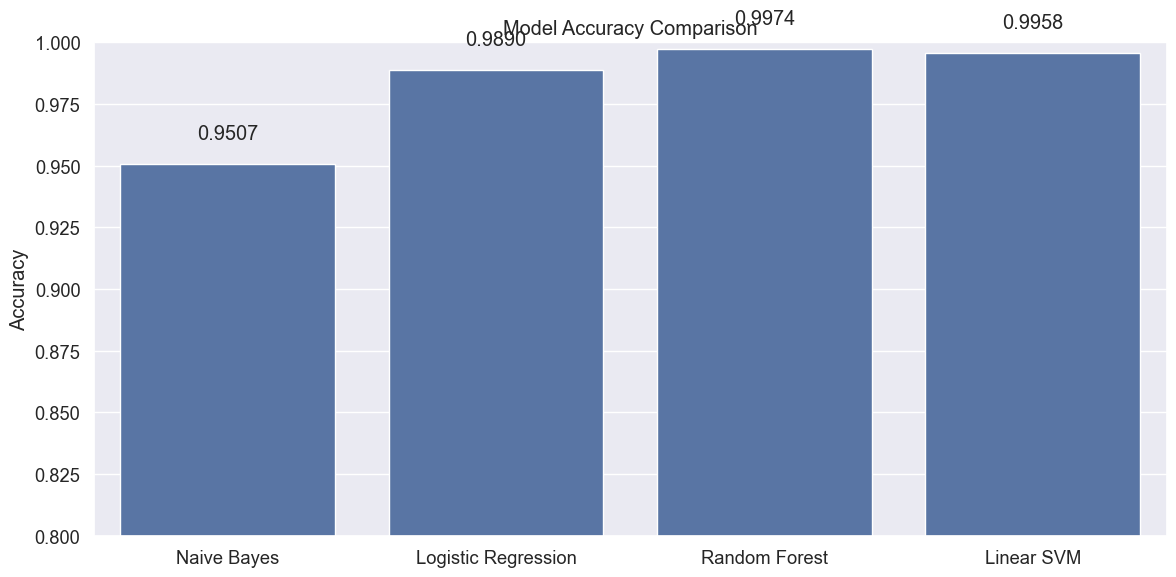

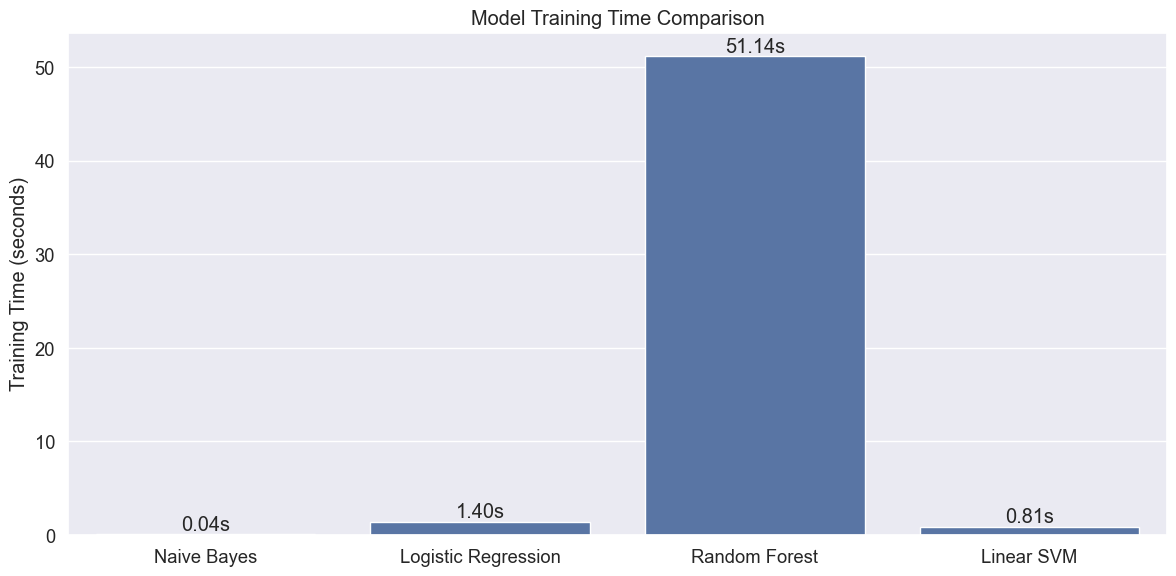

In [7]:
# Evaluate all models
for name, result in results.items():
    print(f"\n--- {name} Evaluation ---")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, result['predictions']))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.show()

# Compare models
plt.figure(figsize=(12, 6))
accuracies = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())

sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust as needed

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.savefig('model_comparison_accuracy.png')
plt.show()

# Compare training times
plt.figure(figsize=(12, 6))
times = [result['training_time'] for result in results.values()]

sns.barplot(x=model_names, y=times)
plt.title('Model Training Time Comparison')
plt.ylabel('Training Time (seconds)')

for i, t in enumerate(times):
    plt.text(i, t + 0.5, f'{t:.2f}s', ha='center')

plt.tight_layout()
plt.savefig('model_comparison_time.png')
plt.show()

Best model: Random Forest with accuracy 0.9974

Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9977

Tuned Random Forest accuracy: 0.9977
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Improvement: 0.02%


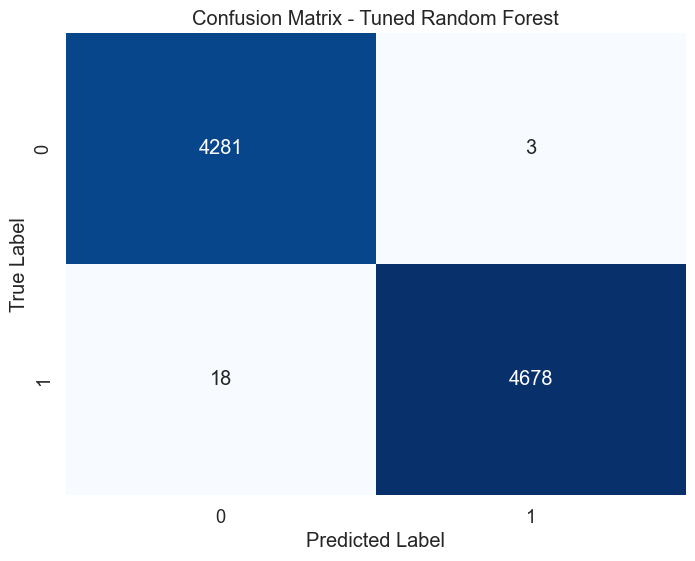

In [8]:
# Identify the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"Best model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

# Hyperparameter tuning for the best model
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

# Different hyperparameter grids depending on the best model
if best_model_name == 'Naive Bayes':
    param_grid = {
        'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
    }
    model = MultinomialNB()
    
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    model = LogisticRegression(max_iter=1000, random_state=42)
    
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)
    
elif best_model_name == 'Linear SVM':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'loss': ['hinge', 'squared_hinge']
    }
    model = LinearSVC(random_state=42, max_iter=10000)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Display results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Evaluate the tuned model
best_model = grid_search.best_estimator_
tuned_preds = best_model.predict(X_test_tfidf)
tuned_accuracy = accuracy_score(y_test, tuned_preds)

print(f"\nTuned {best_model_name} accuracy: {tuned_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, tuned_preds))

# Compare original vs tuned accuracy
print(f"Improvement: {(tuned_accuracy - results[best_model_name]['accuracy'])*100:.2f}%")

# Plot confusion matrix for tuned model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, tuned_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(f'confusion_matrix_tuned_{best_model_name.replace(" ", "_").lower()}.png')
plt.show()

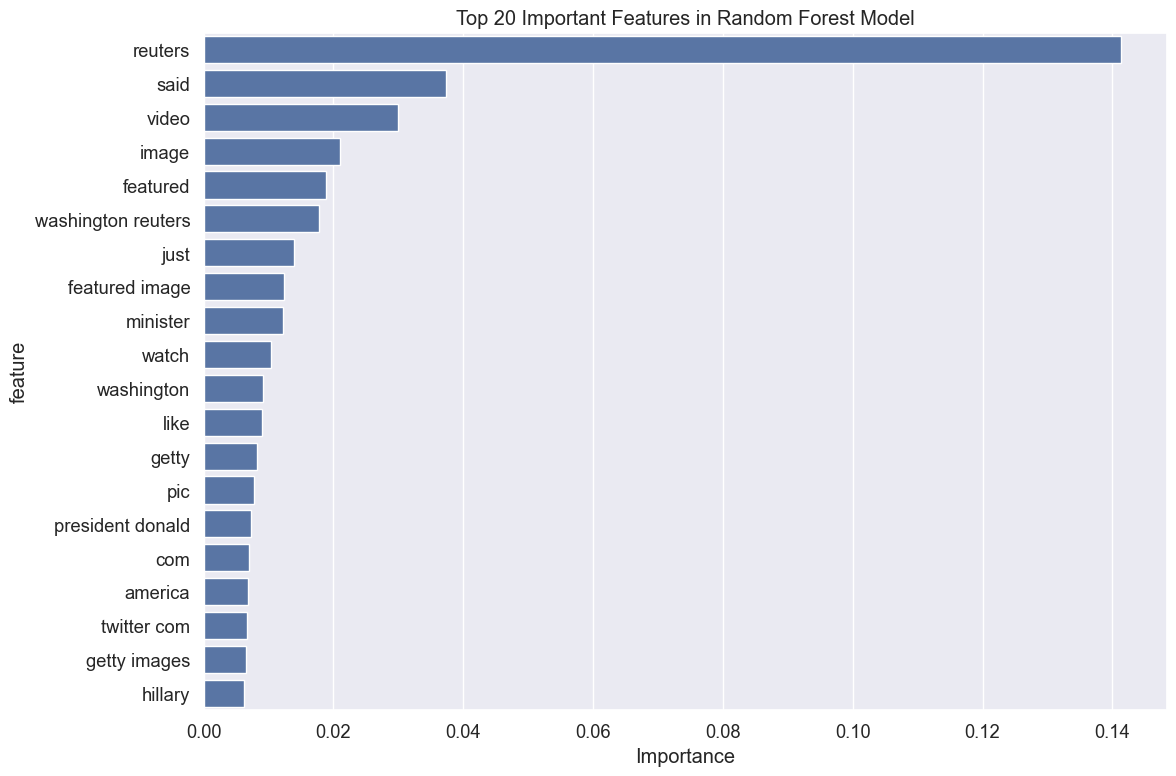

In [9]:
# Feature importance analysis
# For Linear models (Logistic Regression or Linear SVM)
if best_model_name in ['Logistic Regression', 'Linear SVM']:
    # Get feature coefficients
    if best_model_name == 'Logistic Regression':
        coefficients = best_model.coef_[0]
    else:  # Linear SVM
        coefficients = best_model.coef_[0]
    
    # Create dataframe of features and their coefficients
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    })
    
    # Sort by absolute coefficient value
    feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
    feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)
    
    # Top features indicating fake news (positive coefficients)
    fake_indicators = feature_importance[feature_importance['coefficient'] > 0].head(20)
    
    # Top features indicating real news (negative coefficients)
    real_indicators = feature_importance[feature_importance['coefficient'] < 0].head(20)
    
    # Plot top fake news indicators
    plt.figure(figsize=(12, 8))
    sns.barplot(x='coefficient', y='feature', data=fake_indicators.sort_values('coefficient', ascending=False))
    plt.title('Top 20 Features Indicating Fake News')
    plt.xlabel('Coefficient')
    plt.tight_layout()
    plt.savefig('fake_news_indicators.png')
    plt.show()
    
    # Plot top real news indicators
    plt.figure(figsize=(12, 8))
    sns.barplot(x='coefficient', y='feature', data=real_indicators.sort_values('coefficient'))
    plt.title('Top 20 Features Indicating Real News')
    plt.xlabel('Coefficient')
    plt.tight_layout()
    plt.savefig('real_news_indicators.png')
    plt.show()

# For Random Forest
elif best_model_name == 'Random Forest':
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Create dataframe of features and their importances
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # Plot top important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Important Features in Random Forest Model')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png')
    plt.show()

In [10]:
# Select predictions from the best tuned model
predictions = tuned_preds
y_true = y_test.values

# Find misclassified examples
misclassified_indices = np.where(predictions != y_true)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Function to display article text
def display_article(idx, label_pred, label_true):
    article_idx = y_test.index[idx]
    title = df.loc[article_idx, 'title']
    text = df.loc[article_idx, 'text']
    subject = df.loc[article_idx, 'subject'] if 'subject' in df.columns else 'Unknown'
    
    print(f"Article #{article_idx}")
    print(f"PREDICTED: {'FAKE' if label_pred == 1 else 'REAL'}")
    print(f"ACTUAL: {'FAKE' if label_true == 1 else 'REAL'}")
    print(f"SUBJECT: {subject}")
    print(f"TITLE: {title}")
    print("-" * 50)
    print(text[:500] + "..." if len(text) > 500 else text)
    print("=" * 100)

# Display a few misclassified examples
if len(misclassified_indices) > 0:
    print("\nSample Misclassified Articles:")
    for i in range(min(5, len(misclassified_indices))):
        idx = misclassified_indices[i]
        display_article(idx, predictions[idx], y_true[idx])

Number of misclassified examples: 21

Sample Misclassified Articles:
Article #21790
PREDICTED: REAL
ACTUAL: FAKE
SUBJECT: left-news
TITLE: CLINTON CHARITIES RAKED IN TAXPAYER DOLLARS IN THE MILLIONS
--------------------------------------------------
This is like one big slush fund for Hillary 2016. The Clintons not only collected millions from foreign donors, they also rake in $7 million in taxpayer dollars. Really outrageous! The Clinton Foundation and its major health charity have raked in more than $7 million from the U.S. government in recent years, according to an analysis of public records conducted by the Washington Free Beacon.The Clinton Health Access Initiative (CHAI), chaired by Bill Clinton and run by the former president s long...
Article #15571
PREDICTED: REAL
ACTUAL: FAKE
SUBJECT: politics
TITLE: 2012: JUSTICE KENNEDY READ A SCATHING DISSENTING OPINION ON OBAMACARE…Why He May Be The Vote That Saves Obamacare Today
--------------------------------------------------
Whethe

In [11]:
# Save the best model
import pickle

# Save the vectorizer and model
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
print("Model and vectorizer saved to disk.")

# Function to predict on new articles
def predict_fake_news(article_text, vectorizer, model):
    # Preprocess the article
    processed_text = preprocess_text(article_text)
    # Transform to TF-IDF features
    article_vector = vectorizer.transform([processed_text])
    # Make prediction
    prediction = model.predict(article_vector)[0]
    # Get probability if the model supports it
    try:
        probability = model.predict_proba(article_vector)[0][prediction]
        return "FAKE" if prediction == 1 else "REAL", probability
    except:
        return "FAKE" if prediction == 1 else "REAL", None

# Test with a sample news article
sample_article = """
[Insert a sample news article here to test the model]
"""

prediction, confidence = predict_fake_news(sample_article, tfidf_vectorizer, best_model)
print(f"Prediction: {prediction}")
if confidence:
    print(f"Confidence: {confidence:.4f}")

Model and vectorizer saved to disk.
Prediction: FAKE
Confidence: 0.9650



Performing 5-fold cross-validation...
Cross-validation scores: [0.99707684 0.99874722 0.99707684 0.99832939 0.99735487]
Mean accuracy: 0.9977
Standard deviation: 0.0007


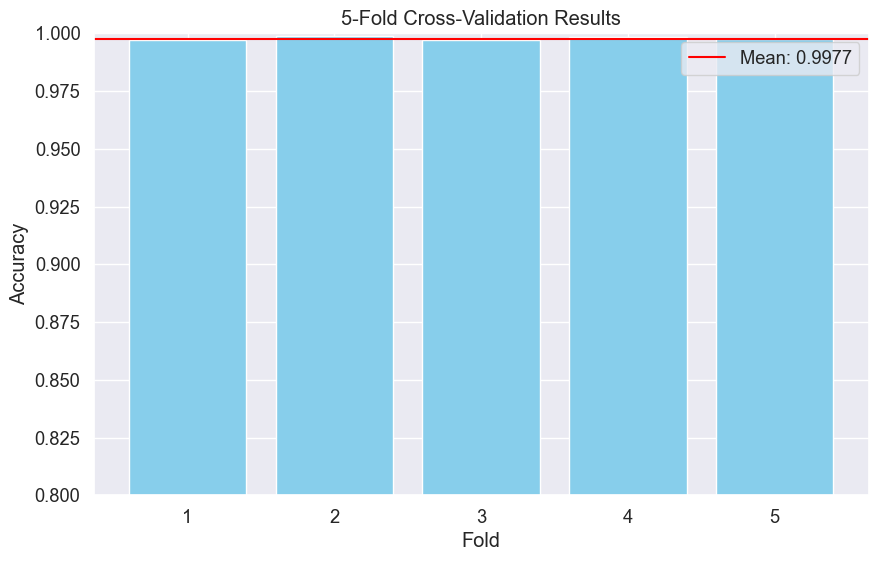

In [12]:
# Cross-validation
from sklearn.model_selection import cross_val_score

print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Plot CV results
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores, color='skyblue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='-', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Results')
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.xticks(range(1, 6))
plt.legend()
plt.savefig('cross_validation_results.png')
plt.show()

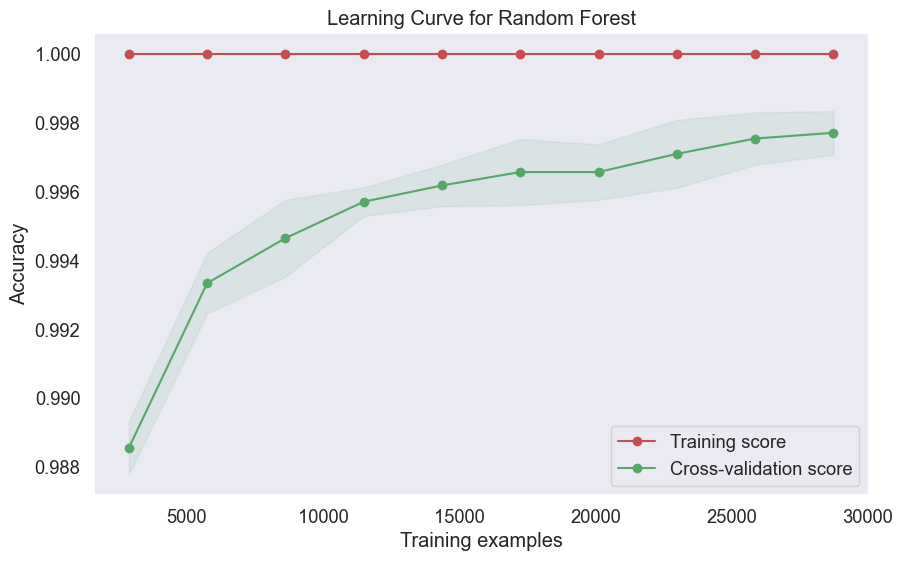

In [13]:
# Learning curves
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_tfidf, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, n_jobs=-1
)

# Calculate mean and std for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title(f"Learning Curve for {best_model_name}")
plt.legend(loc="best")
plt.savefig('learning_curve.png')
plt.show()